In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm

# Assignment 4 - Classification

For this assignment, you'll need to perform a classification on a dataset, as well as do some prep work on the data. 

The exact steps of what you need to do are flexible and up to you to some degree, however you should consider some of the important things we've mentioned recently, such as:
<ul>
<li> Is the target balanced?
<li> Are there missing or erroneous values?
<li> Are there categorical or numerical features?
<li> Is there colinearity?
<li> Are there outliers?
<li> Should we normalize? 
<li> Do the distributions of the features give any indication that some may need work? 
</ul>

Basically, the data is in the original, potentially dirty, format, and you need to find what should be cleaned, and do the cleaning. There is not one "right" answer to what has to be done, and you'll probably need to do it with at least something of an iterative process - find an issue, correct it, check the data, repeat.

<b>The target that we are predicting is the loan_status. </b>

## Grading

The grades will be broken down as follows:
<ul>
<li> <b>30%</b> - a working predictive model with a reasonable level of accuracy. 
    <ul>
    <li> For the accuracy part, it will not be explicitly graded, but compared to all the others. If you're in the same general range, that's good - if yours is drastically less accurate (or, I guess more accurate), then I'll adjust. There won't be a comparison of "this person is 72.3% and this person is only 71.8% accurate, they fail."
    <li> This data is larger than most of the small sample sets, so random variations due to train-test splits shouldn't be too bad. (If you're a keener you could loop)
    <li> I will use the F1 score as the accuracy metric. 
    </ul>
<li> <b>40%</b> - a clear and readable description of what steps you took to prepare the data, and a brief not on the rationale behind it. Did you do a log transformation to a skewed feature, did you remove outliers, did you remove a feature that has a lot of missing values? Please put this somewhere obvious and readable, consider the goal of the assignment to explain your process to me. 
    <ul>
    <li> E.g. "The target data was imbalanced, so I tried several resampling methods and chose the one with the highest accuracy of the resulting model", "the feature X had the same value for 95% of records, so I dropped it". 
    <li> In this, please also state if you see a group that appears to be a good credit risk, and a group that is a bad credit risk, and indicate the evidence showing that. Please do this other than the most simplistic way - more money = better credit. If there are no such groups, state why you think this. This will likely be about 3 - 5 statements or points, you should provide evidence from the data, but it does not need to be an essay. (You may want to consider this question after you're pretty much done with the data prep and modelling.)
    </ul>
<li> <b>30%</b> - allowing your model to be "deployed". At the bottom of this file there is a small block of code to load in some test data (that I have), and calculate your accuracy. Your contribution to this part is to have a model that is ready to make predictions. Some specifics to consider:
    <ul>
    <li> The test data will be in exactly the same format as the dataset you're given. So any steps that you took to prepare your data for modelling will need to be mirroed here, so the new  data can be predicted. The easiest way to do this is to use a pipeline, but it is up to you. Remember the model only accepts data that is in a certain format - the one that you had the data in when it was trained, so when making predictions you need to make sure that is true. 
    <li> Since I'm providing test data, and your task is to just create a model, think about how that might impact your train-test splitting, both as you're developing and for the final product. 
    <li> Once the model is trained it should predict any data that is in the right format, so I should be able to provide any proper dataset, click run on that testing cell, and get predictions. I will not be doing anything that will purposefully make this harder or trickier, like including data that has errors or is in the wrong format, I just split the entire set of data, reserved part of it to test accuracy, and gave the rest to you. Things that you've changed (e.g. dropping a column, one-hot encoding) do need to be replicated at some point before the model can accept the new data to predict. In general we <b>do</b> want to check in our processing that our input is valid, this is kind of a junior introduction to that. 
    </ul>
</ul

## Load Credit Data

In [217]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,26967,27,120000,MORTGAGE,3.0,PERSONAL,B,14000,11.99,0,0.12,N,10
1,8449,24,58000,MORTGAGE,8.0,DEBTCONSOLIDATION,A,15700,7.90,0,0.27,N,3
2,20983,30,45000,RENT,11.0,MEDICAL,C,5000,12.73,1,0.11,Y,8
3,19612,35,35000,MORTGAGE,5.0,EDUCATION,B,5600,11.49,0,0.16,N,6
4,30371,38,55000,RENT,0.0,EDUCATION,C,6500,11.03,0,0.12,Y,12


### Accuracy Test

Replace the green part with whatever you need to transform the fresh data into the format needed for your model to predict. 

<b>Note:</b> you could test and make sure that things are working OK here by taking part of your dataset, saving it in a separate CSV, and running it through here as a piece of test data. The accuracy results would be useless, but you'd confirm that the model works properly. 

In [218]:
df.describe()

,Unnamed: 0,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,26064.000000,26064.000000,2.606400e+04,25350.000000,26064.000000,23575.000000,26064.000000,26064.000000,26064.000000
mean,16307.473258,27.738375,6.602795e+04,4.791440,9595.886088,11.006839,0.216812,0.170264,5.805210
std,9396.129345,6.381305,6.265098e+04,4.100277,6321.894580,3.245217,0.412082,0.106673,4.055158
min,0.000000,20.000000,4.080000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8202.250000,23.000000,3.879375e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16324.500000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24458.250000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32580.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26064 entries, 0 to 26063
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  26064 non-null  int64  
 1   person_age                  26064 non-null  int64  
 2   person_income               26064 non-null  int64  
 3   person_home_ownership       26064 non-null  object 
 4   person_emp_length           25350 non-null  float64
 5   loan_intent                 26064 non-null  object 
 6   loan_grade                  26064 non-null  object 
 7   loan_amnt                   26064 non-null  int64  
 8   loan_int_rate               23575 non-null  float64
 9   loan_status                 26064 non-null  int64  
 10  loan_percent_income         26064 non-null  float64
 11  cb_person_default_on_file   26064 non-null  object 
 12  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(6), object

In [220]:
df.isna().count()

Unnamed: 0                    26064
person_age                    26064
person_income                 26064
person_home_ownership         26064
person_emp_length             26064
loan_intent                   26064
loan_grade                    26064
loan_amnt                     26064
loan_int_rate                 26064
loan_status                   26064
loan_percent_income           26064
cb_person_default_on_file     26064
cb_person_cred_hist_length    26064
dtype: int64

In [221]:
df2=df.dropna()
df2.isna().sum()


Unnamed: 0                    0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [222]:
df2.describe()

,Unnamed: 0,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,22919.000000,22919.000000,2.291900e+04,22919.000000,22919.000000,22919.000000,22919.000000,22919.000000,22919.000000
mean,16319.255378,27.733540,6.668813e+04,4.795934,9670.580086,11.035697,0.215803,0.169662,5.796413
std,9372.236618,6.335769,6.406204e+04,4.108956,6329.359254,3.234413,0.411388,0.106406,4.035816
min,0.000000,20.000000,4.080000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8227.000000,23.000000,3.960000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16329.000000,26.000000,5.578200e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24465.500000,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,32580.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [244]:
df2=df2[df2['person_age']<80]
df2=df2[df2['person_emp_length']<60]
df2=df2.drop(columns={'Unnamed: 0'})
df2=df2[df2['person_income']<300000]
df2['person_income']=np.log(df['person_income'])



In [224]:
df2.describe()

,Unnamed: 0,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,22794.000000,22794.000000,22794.000000,22794.00000,22794.000000,22794.000000,22794.000000,22794.000000,22794.000000
mean,16276.204747,27.673511,10.927559,4.77731,9629.094279,11.032775,0.216504,0.170322,5.772484
std,9357.606262,6.116300,0.536819,4.02182,6277.144860,3.234108,0.411871,0.106229,4.011544
min,1.000000,20.000000,8.313852,0.00000,500.000000,5.420000,0.000000,0.010000,2.000000
25%,8197.250000,23.000000,10.583549,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16264.500000,26.000000,10.916161,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24393.750000,30.000000,11.283965,7.00000,12375.000000,13.480000,0.000000,0.230000,8.000000
max,32580.000000,76.000000,12.591335,38.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [225]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22794 entries, 0 to 26063
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  22794 non-null  int64  
 1   person_age                  22794 non-null  int64  
 2   person_income               22794 non-null  float64
 3   person_home_ownership       22794 non-null  object 
 4   person_emp_length           22794 non-null  float64
 5   loan_intent                 22794 non-null  object 
 6   loan_grade                  22794 non-null  object 
 7   loan_amnt                   22794 non-null  int64  
 8   loan_int_rate               22794 non-null  float64
 9   loan_status                 22794 non-null  int64  
 10  loan_percent_income         22794 non-null  float64
 11  cb_person_default_on_file   22794 non-null  object 
 12  cb_person_cred_hist_length  22794 non-null  int64  
dtypes: float64(4), int64(5), object

In [226]:
df2['loan_status'].value_counts()
len(df2[df2['loan_status']==0])/len(df2)

0.7834956567517768

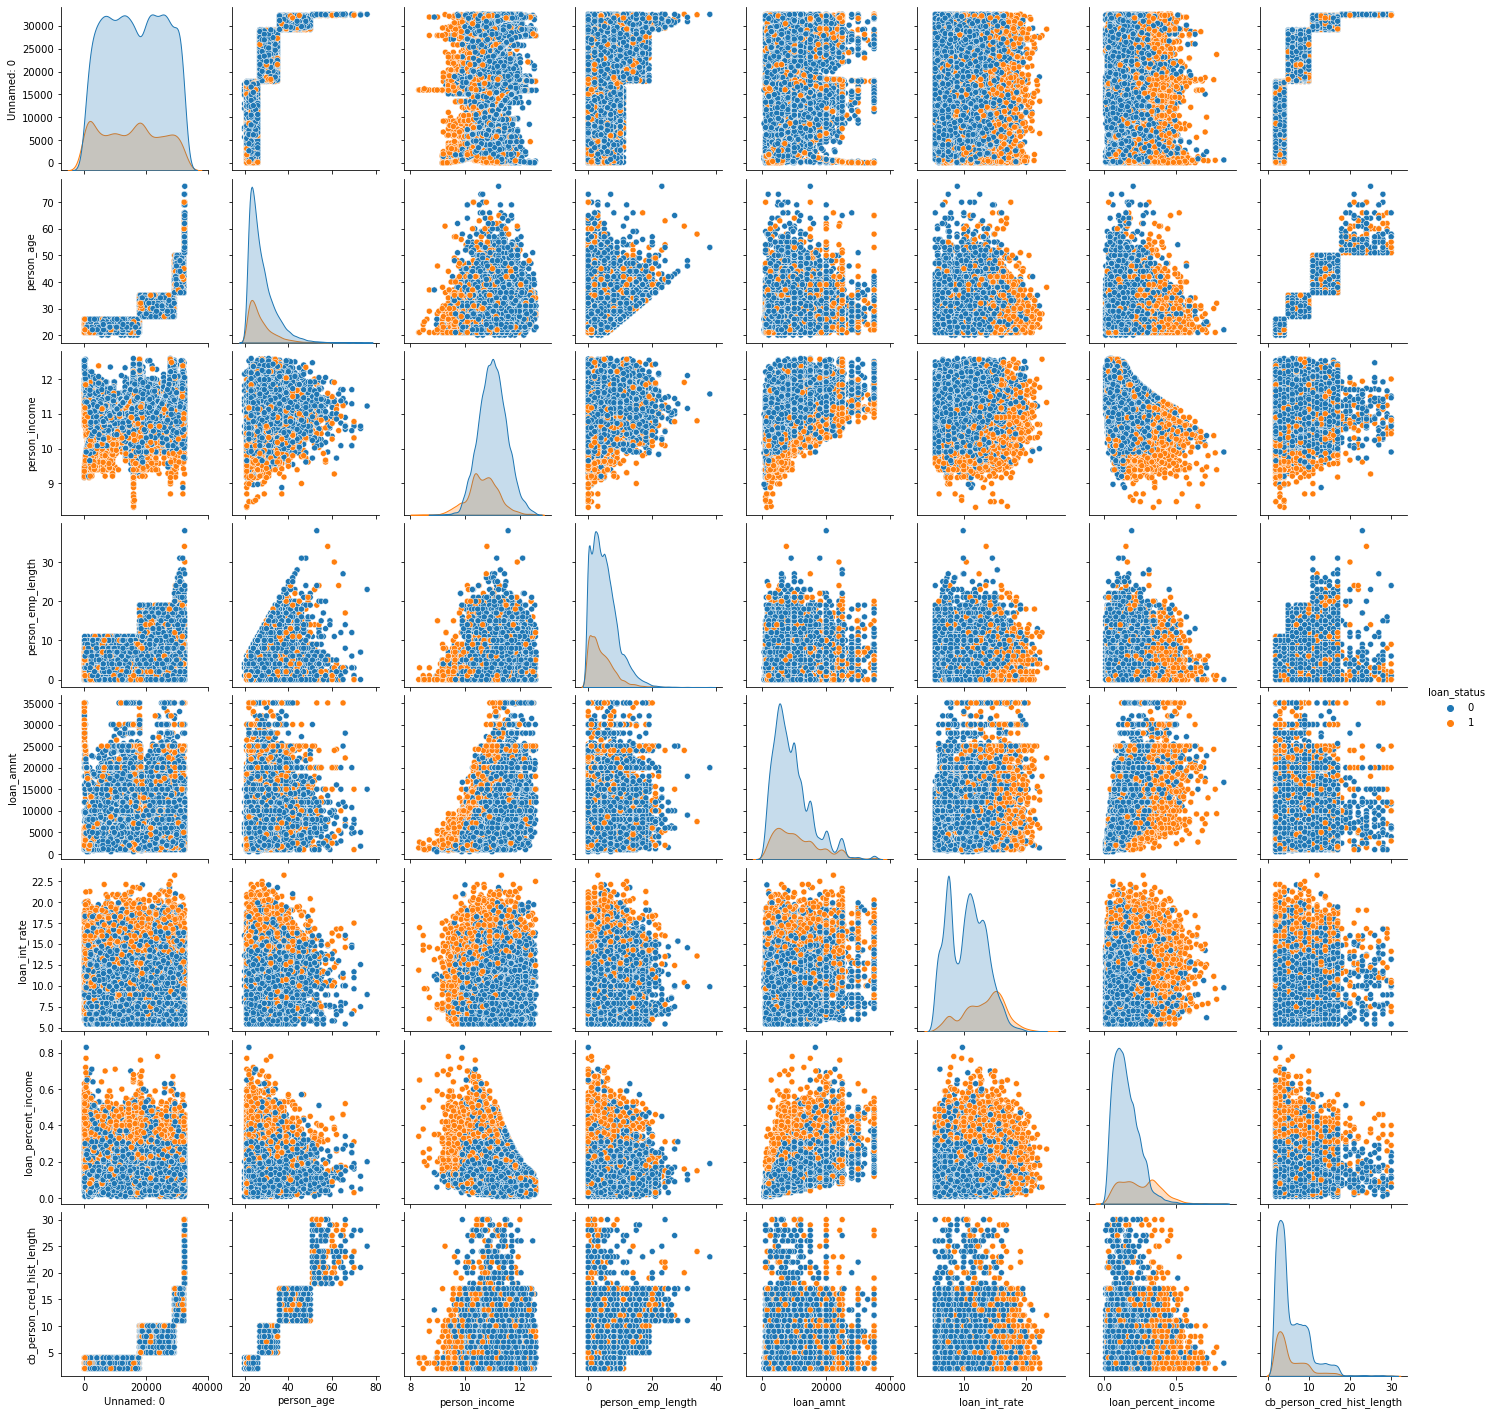

In [227]:
sns.pairplot(df2, hue='loan_status')

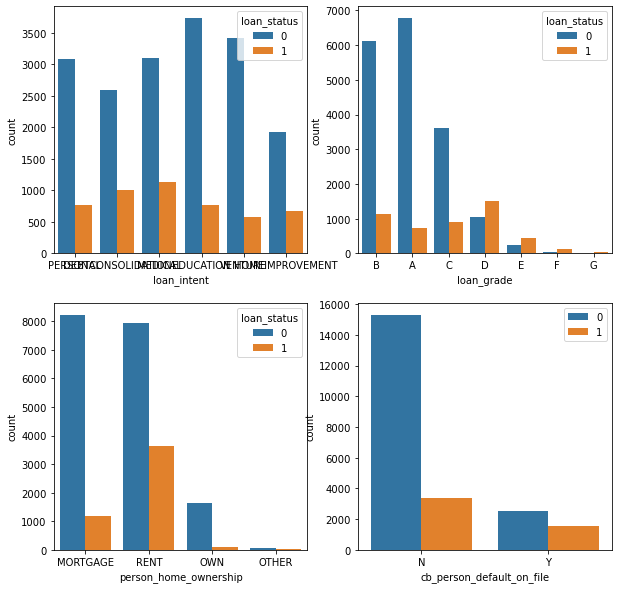

In [228]:
thinkplot.PrePlot(4,2,2)
sns.countplot(data=df2, x="loan_intent", hue="loan_status")
thinkplot.SubPlot(2)
sns.countplot(data=df2, x="loan_grade", hue="loan_status")
thinkplot.SubPlot(3)
sns.countplot(data=df2, x="person_home_ownership", hue="loan_status")
thinkplot.SubPlot(4)
sns.countplot(data=df2, x="cb_person_default_on_file", hue="loan_status")
thinkplot.Config()

In [229]:
df2_ = pd.get_dummies(df2, drop_first=True)
df2_.head()

,Unnamed: 0,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,26967,27,11.695247,3.0,14000,11.99,0,0.12,10,0,...,0,1,0,1,0,0,0,0,0,0
1,8449,24,10.968198,8.0,15700,7.90,0,0.27,3,0,...,0,0,0,0,0,0,0,0,0,0
2,20983,30,10.714418,11.0,5000,12.73,1,0.11,8,0,...,1,0,0,0,1,0,0,0,0,1
3,19612,35,10.463103,5.0,5600,11.49,0,0.16,6,0,...,0,0,0,1,0,0,0,0,0,0
4,30371,38,10.915088,0.0,6500,11.03,0,0.12,12,0,...,0,0,0,0,1,0,0,0,0,1


In [230]:
df2_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22794 entries, 0 to 26063
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   22794 non-null  int64  
 1   person_age                   22794 non-null  int64  
 2   person_income                22794 non-null  float64
 3   person_emp_length            22794 non-null  float64
 4   loan_amnt                    22794 non-null  int64  
 5   loan_int_rate                22794 non-null  float64
 6   loan_status                  22794 non-null  int64  
 7   loan_percent_income          22794 non-null  float64
 8   cb_person_cred_hist_length   22794 non-null  int64  
 9   person_home_ownership_OTHER  22794 non-null  uint8  
 10  person_home_ownership_OWN    22794 non-null  uint8  
 11  person_home_ownership_RENT   22794 non-null  uint8  
 12  loan_intent_EDUCATION        22794 non-null  uint8  
 13  loan_intent_HOME

In [231]:
dfy=df2_['loan_status']
dfx=df2_.drop(columns={'loan_status'})
y=np.array(dfy).reshape (-1,1)
x=np.array(dfx)
x.shape, y.shape

((22794, 23), (22794, 1))

In [232]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [233]:
#train, test = train_test_split(df2_, test_size=.3)

In [234]:
#y_test = np.array(test["loan_status"]).reshape(-1,1)
#X_test = np.array(test.drop(columns={"loan_status"}))

In [235]:
#df_zero = train[train["loan_status"]==0]
#df_one = train[train["loan_status"]==1]
#df_z = df_zero.sample(len(df_one))
#df_Under = pd.concat([df_z, df_one])
#y_train2 = np.array(df_Under["loan_status"]).reshape(-1,1)
#X_train2 = np.array(df_Under.drop(columns={"loan_status"}))
#print(X_train2.shape, y_train2.shape, X_test.shape, y_test.shape)

In [236]:
def convert_prob_to_label(prob, cutoff = 0.5):
    label = []
    for i in range(len(prob)):
        if prob[i] > cutoff:
            label.append(1)
        else:
            label.append(0)
    return label

F1: 0.6249495357287042
Acc: 0.8641614271092265
Recall: 0.5294117647058824
Precision: 0.7625615763546798


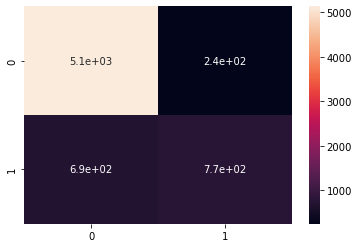

In [237]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score

scaler = MinMaxScaler()
x = scaler.fit_transform(X_train)
X_trans = scaler.transform(X_test)
model = LogisticRegression().fit(x,y_train.ravel())
preds = model.predict(X_trans)
labels = convert_prob_to_label(np.array(preds))
conf_matrix = confusion_matrix(y_test,labels)
sns.heatmap(conf_matrix, annot=True)

print("F1:",f1_score(y_test, labels))
print("Acc:",accuracy_score(y_test, labels))
print("Recall:",recall_score(y_test, labels)) 
print("Precision:",precision_score(y_test, labels))

In [238]:
dfP_ = pd.get_dummies(data=df2, drop_first=True)

In [239]:
formP = "loan_status ~ 	person_age+person_income+person_emp_length+loan_amnt+loan_int_rate+loan_percent_income+cb_person_cred_hist_length+person_home_ownership_OTHER+person_home_ownership_OWN+loan_intent_MEDICAL+loan_intent_PERSONAL+loan_intent_VENTURE	+loan_grade_B+loan_grade_C+loan_grade_D+loan_grade_E+loan_grade_F+loan_grade_G+cb_person_default_on_file_Y"
modelP_SM = sm.logit(data=dfP_, formula=formP).fit()
modelP_SM.summary()

Optimization terminated successfully.
         Current function value: 0.342264
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                22794
Model:                          Logit   Df Residuals:                    22774
Method:                           MLE   Df Model:                           19
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.3449
Time:                        12:54:08   Log-Likelihood:                -7801.6
converged:                       True   LL-Null:                       -11909.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       8.8554      0.990      8.941      0.000       6.914      10.797
person_age                     -0.0017      0.007     -0.244      0.807      -0.015       0.012
person_income                  -1.2090      0.090    -13.457      0.000      -1.385      -1.033
person_emp_length              -0.0219      0.006     -3.901      0.000      -0.033      -0.011
loan_amnt                   -1.272e-05   8.45e-06     -1.506      0.132   -2.93e-05    3.83e-06
loan_int_rate                   0.1025      0.020      5.099      0.000       0.063       0.142
loan_percent_income             8.4376      0.441     19.139      0.000       7.574       9.302
cb_person_cred_hist_length      0.0052      0.011      0.492      0.623      -0.016       0.026
person_home_ownership_OTHER     0.1745      0.341      0.511      0.609      -0.494       0.843
person_home_ownership_OWN      -2.4520      0.120    -20.458      0.000      -2.687      -2.217
loan_intent_MEDICAL             0.1552      0.053      2.930      0.003       0.051       0.259
loan_intent_PERSONAL           -0.2983      0.059     -5.060      0.000      -0.414      -0.183
loan_intent_VENTURE            -0.7572      0.063    -11.945      0.000      -0.881      -0.633
loan_grade_B                    0.0974      0.092      1.064      0.287      -0.082       0.277
loan_grade_C                    0.2164      0.138      1.571      0.116      -0.054       0.487
loan_grade_D                    2.2349      0.174     12.853      0.000       1.894       2.576
loan_grade_E                    2.3906      0.217     10.997      0.000       1.965       2.817
loan_grade_F                    2.5150      0.302      8.326      0.000       1.923       3.107
loan_grade_G                    6.1025      1.083      5.633      0.000       3.979       8.226
cb_person_default_on_file_Y    -0.0223      0.059     -0.378      0.706      -0.138       0.094
===============================================================================================
"""

In [240]:
dfXP2 = df2_.drop(columns={"loan_status","cb_person_default_on_file_Y","cb_person_cred_hist_length","loan_int_rate","loan_amnt","person_emp_length","person_age","loan_grade_C","loan_grade_B","loan_intent_PERSONAL","loan_intent_MEDICAL","person_home_ownership_OTHER"}) 
xP2 = np.array(dfXP2)
xP2.shape, y.shape

((22794, 12), (22794, 1))

In [241]:
X_trainP2, X_testP2, y_trainP2, y_testP2 = train_test_split(xP2, y, test_size=0.3)

F1: 0.6490536277602523
Acc: 0.8698640152069016
Recall: 0.5294117647058824
Precision: 0.7625615763546798


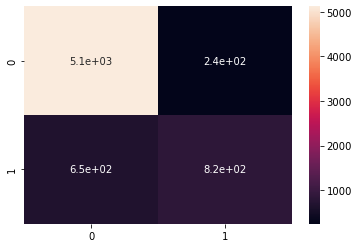

In [242]:
scalerP2 = MinMaxScaler()

#Use training data to fit the scaler, then apply that predefined scale to the test data
x2P2 = scalerP2.fit_transform(X_trainP2)
X_transP2 = scalerP2.transform(X_testP2)

modelP2 = LogisticRegression().fit(x2P2,y_trainP2.ravel())


predsP2 = modelP2.predict(X_transP2)

labelsP2 = convert_prob_to_label(np.array(predsP2))
conf_matrixP2 = confusion_matrix(y_testP2,labelsP2)
sns.heatmap(conf_matrixP2, annot=True)

print("F1:",f1_score(y_testP2, labelsP2))
print("Acc:",accuracy_score(y_testP2, labelsP2))
print("Recall:",recall_score(y_test, labels)) 
print("Precision:",precision_score(y_test, labels))

In [ ]:
d_test = pd.read_csv("test.csv")

######################
# Insert whatever you need to do to prep the data here. 
# It might be nothing if you have a big pipeline. 
# Ensure that at the end your data is in two arrays - xtest and ytest
# Ensure the name of your final model is "model"
# Each should contain the ENTIRE x or y dataset in the test data. 
#
# This part should be reusable - any dataset in this format should just run
# and generate predictions and accuracy stats. 
# Please DO NOT do any train-test splitting here. 
#######################

# This should work once you're done, as is. 
# uncomment the stuff below when ready to run.
#print("F1:",f1_score(ytest, prediction_labels))
#conf_matrix = confusion_matrix(ytest, prediction_labels)
#sns.heatmap(conf_matrix, annot=True)